# Squidpy test

In [33]:

from anndata import AnnData
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings

# options
%matplotlib inline
plt.style.use("seaborn")
mpl.rcParams["figure.dpi"] = 110
warnings.filterwarnings("ignore")


### Create random data with one common and one rare gene

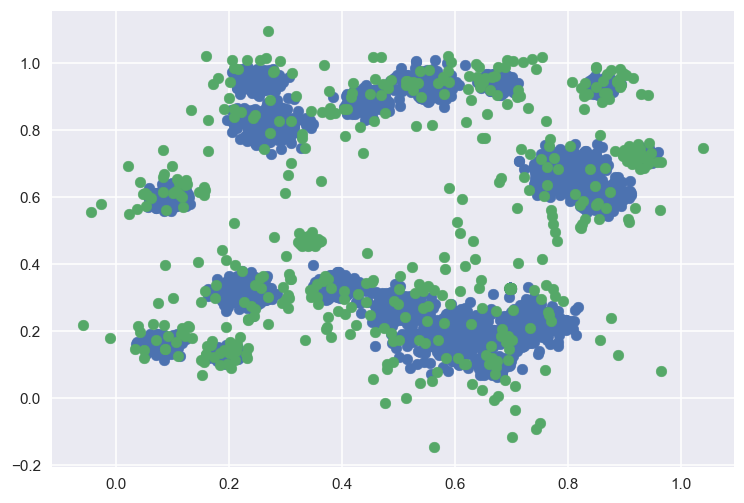

In [41]:
from numpy.random import default_rng
rng = default_rng(seed=12345)

N_common_cell = 5000
N_rare_cell = 500


N_clusters = 20
xy_c = rng.random((N_clusters, 2))
sigma_c = 0.05*rng.random((N_clusters,1))

id_common = rng.integers(low=0, high=N_clusters, size=N_common_cell)
eps_common = rng.normal(loc=0, scale=1, size=(N_common_cell, 2))
xy_common = xy_c[id_common] + sigma_c[id_common]*eps_common

id_rare = rng.integers(low=0, high=N_clusters, size=N_rare_cell)
eps_rare = rng.normal(loc=0, scale=1, size=(N_rare_cell, 2))
xy_rare = xy_c[id_rare] + 3*sigma_c[id_rare]*eps_rare



plt.scatter(xy_common[:,0], xy_common[:,1])
plt.scatter(xy_rare[:,0], xy_rare[:,1])

### Make a Panda Dataframe

In [42]:
xy_all = np.concatenate((xy_common, xy_rare), axis=0)
cell_type = np.ones(N_common_cell+N_rare_cell, dtype=int)
cell_type[-N_rare_cell:]=2

df = pd.DataFrame(xy_all, columns=['x', 'y'])
df['cell_type'] = pd.Categorical(cell_type)

df.head()
#df.dtypes

,x,y,cell_type
0,0.071895,0.148228,1
1,0.246743,0.936438,1
2,0.382869,0.324581,1
3,0.230114,0.969068,1
4,0.477584,0.304780,1


### Make adata

In [43]:
import anndata

CELL_TYPES = ["common", "rare"]
index = np.arange(len(CELL_TYPES))
name_to_index = dict(zip(CELL_TYPES, index))

def make_adata_from_df(df: pd.DataFrame) -> AnnData:
    return AnnData(
        obsm={"spatial": df[["x", "y"]].to_numpy()},
        obs=pd.DataFrame(df["cell_type"].apply(lambda x: CELL_TYPES[x-1]), dtype="category"))

adata = make_adata_from_df(df)

In [44]:
adata

AnnData object with n_obs × n_vars = 5500 × 0
    obs: 'cell_type'
    obsm: 'spatial'

DEBUG LUCA: 0.06225105 0.61010754


  0%|          | 0/1 [00:00<?, ?/s]

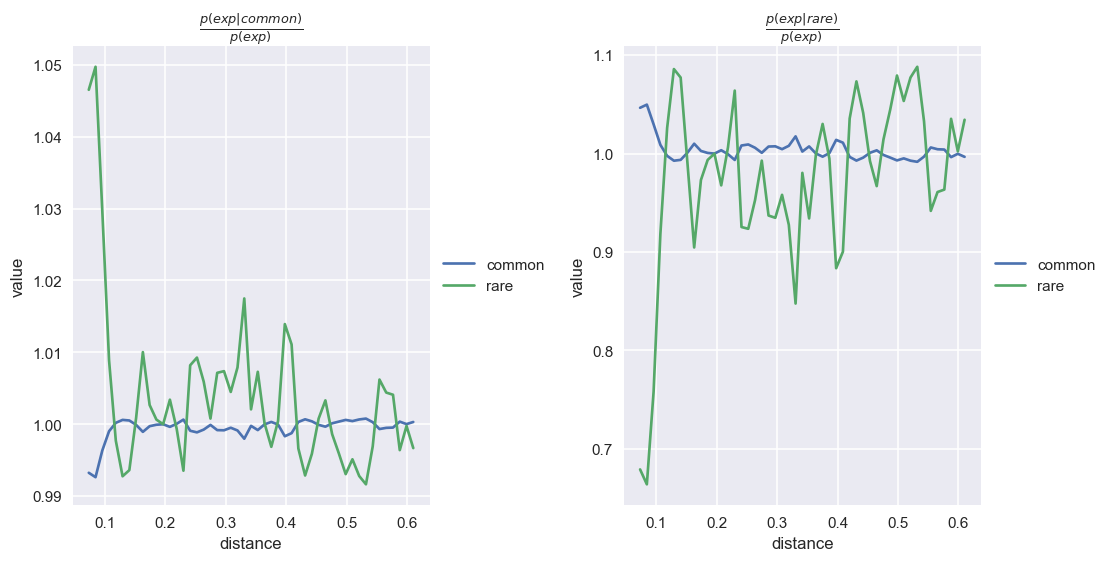

In [45]:
sq.gr.co_occurrence(adata, cluster_key="cell_type")
sq.pl.co_occurrence(adata, cluster_key="cell_type", clusters=["common", "rare"])